In [ ]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 668M/675M [00:08<00:00, 78.7MB/s]
100% 675M/675M [00:08<00:00, 79.0MB/s]


In [ ]:
# unzip the file 
import zipfile
zip_ref = zipfile.ZipFile('/content/cell-images-for-detecting-malaria.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!ls

cell_images  cell-images-for-detecting-malaria.zip  kaggle.json  sample_data


In [ ]:
#import all the necessary libraries
import os # for accessing the files 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # visualize and process the image
import cv2 # open cv
from google.colab.patches import cv2_imshow # per cell e img show korar jnno within this window
from PIL import Image #read images and do some processes on it 
from sklearn.model_selection import train_test_split
import seaborn as sns
from glob import glob
import pandas as pd

In [ ]:
parasitized_file =os.listdir( '/content/cell_images/Parasitized')
print(parasitized_file[0:5])
print(parasitized_file[-5:])

['C130P91ThinF_IMG_20151004_141428_cell_136.png', 'C184P145ThinF_IMG_20151203_104030_cell_10.png', 'C120P81ThinF_IMG_20151002_130150_cell_197.png', 'C132P93ThinF_IMG_20151004_151941_cell_13.png', 'C68P29N_ThinF_IMG_20150819_133447_cell_167.png']
['C97P58ThinF_IMG_20150917_151512_cell_160.png', 'C51AP12thinF_IMG_20150724_155046_cell_104.png', 'C146P107ThinF_IMG_20151018_135703_cell_223.png', 'C101P62ThinF_IMG_20150918_151507_cell_77.png', 'C179P140ThinF_IMG_20151127_153852_cell_168.png']


In [ ]:
uninfected_file =os.listdir( '/content/cell_images/Uninfected')
print(uninfected_file[0:5])
print(uninfected_file[-5:])

['C208ThinF_IMG_20151029_155827_cell_157.png', 'C104P65ThinF_IMG_20150918_171154_cell_190.png', 'C217ThinF_IMG_20151106_141326_cell_191.png', 'C174P135NThinF_IMG_20151127_135311_cell_142.png', 'C169P130ThinF_IMG_20151118_163539_cell_1.png']
['C39P4thinF_original_IMG_20150622_111723_cell_7.png', 'C88P49ThinF_IMG_20150820_150724_cell_161.png', 'C138P99ThinF_IMG_20151005_171116_cell_127.png', 'C105P66ThinF_IMG_20150924_095034_cell_53.png', 'C148P109ThinF_IMG_20151115_112538_cell_56.png']


In [ ]:
print("Number of early blight :",len(parasitized_file))
print("Number of healthy :",len(uninfected_file))


Number of early blight : 13780
Number of healthy : 13780


In [ ]:
# Creating the label 
# 0 -> parasitize 
# 1 -> uninfected 


parasitized_label = [0]*13780
uninfected_label = [1]*13780

In [ ]:
print("Parasitized first 5 labels ",parasitized_label[0:5])
print("parasitized last 5 labels ",parasitized_label[-5:])


Parasitized first 5 labels  [0, 0, 0, 0, 0]
parasitized last 5 labels  [0, 0, 0, 0, 0]


In [ ]:
print("uninfected first 5 labels ",uninfected_label[0:5])
print("uninfected last 5 labels ",uninfected_label[-5:])

uninfected first 5 labels  [1, 1, 1, 1, 1]
uninfected last 5 labels  [1, 1, 1, 1, 1]


In [ ]:
labels = parasitized_label + uninfected_label 
print(labels[0:5])
print(labels[-5:])
print(len(labels))

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
27560


Displaying the image

In [ ]:
data_dir = r"/content/cell_images/cell_images"
target_classes = os.listdir(data_dir)
print(target_classes)

['Uninfected', 'Parasitized']


In [ ]:
infected_images     = glob(os.path.join(data_dir, target_classes[0])+"/*.png")
uninfected_images   = glob(os.path.join(data_dir, target_classes[1])+"/*.png")

<ipython-input-14-f800c6d82a00>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,indx+1)


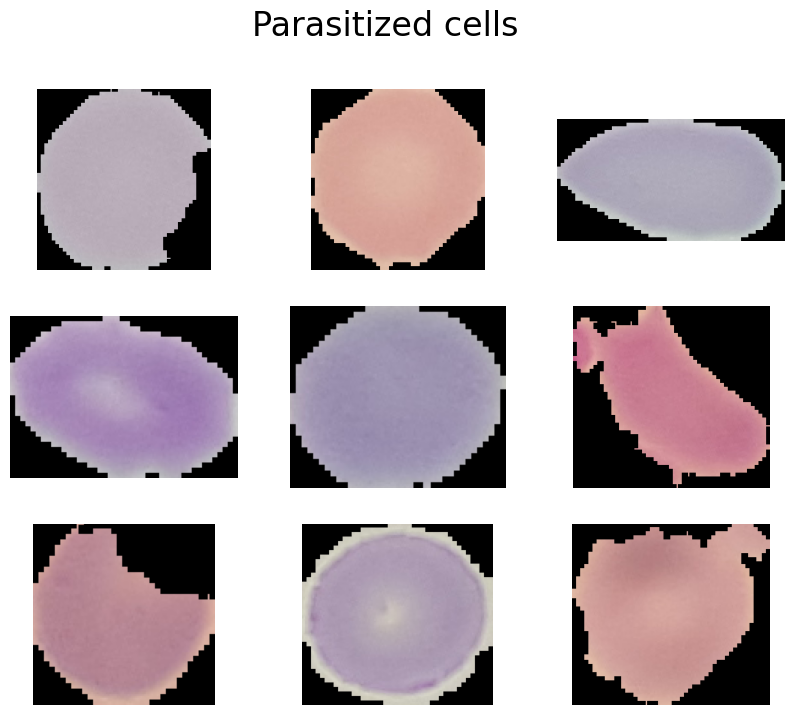

In [ ]:
# show the infected cell 
fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('Parasitized cells', fontsize=24)

for indx,img_src in enumerate(infected_images[:9]):
  plt.subplot(3,3,indx+1)
  img = plt.imread(img_src)
  plt.axis('off')
  plt.imshow(img)



<ipython-input-15-c8eb7f3dafe1>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,indx+1)


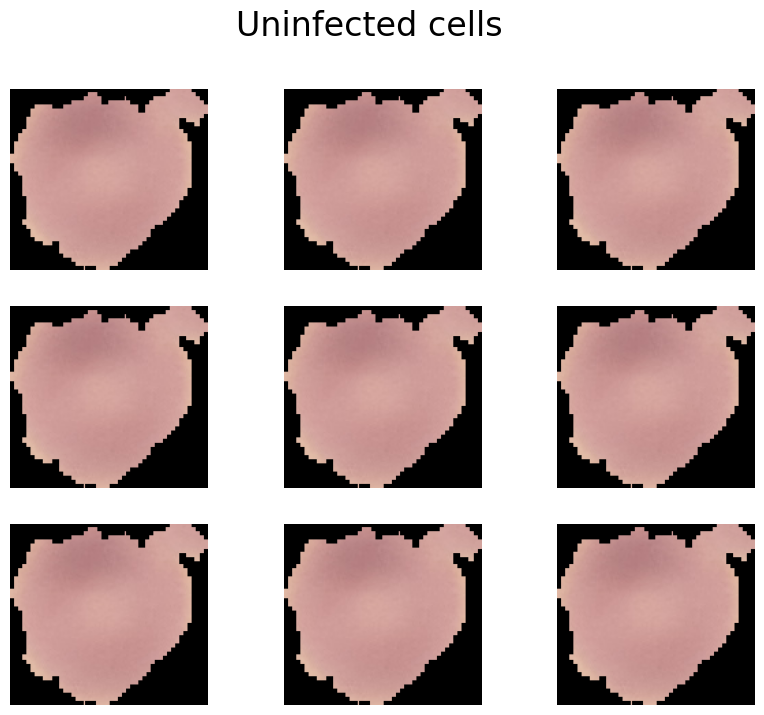

In [ ]:
# show the uninfected cell
fig,ax = plt.subplots(figsize=(10,8))
fig.suptitle("Uninfected cells",fontsize = 24)

for indx,img_src in enumerate(uninfected_images[:9]):
  plt.subplot(3,3,indx+1)
  plt.imread(img_src)
  plt.axis('off')
  plt.imshow(img)

In [ ]:
image_folder = '/content/cell_images/cell_images/Parasitized'
file_to_delete = '/content/cell_images/cell_images/Parasitized/Thumbs.db'

# Construct the full path to the file
file_path = os.path.join(image_folder, file_to_delete)

# Check if the file exists
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"{file_to_delete} deleted successfully.")
else:
    print(f"{file_to_delete} does not exist.")
  


/content/cell_images/cell_images/Parasitized/Thumbs.db deleted successfully.


In [ ]:
image_folder = '/content/cell_images/cell_images/Uninfected'
file_to_delete = '/content/cell_images/cell_images/Uninfected/Thumbs.db'

# Construct the full path to the file
file_path = os.path.join(image_folder, file_to_delete)

# Check if the file exists
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"{file_to_delete} deleted successfully.")
else:
    print(f"{file_to_delete} does not exist.")

/content/cell_images/cell_images/Uninfected/Thumbs.db deleted successfully.


In [ ]:
# conver the images into numpy arrays

parasitize = '/content/cell_images/cell_images/Parasitized/'
data = []

for image_file in  os.listdir(parasitize):
  image = Image.open(parasitize + image_file)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



In [ ]:
uninfected = '/content/cell_images/cell_images/Uninfected/'

for image_file in  os.listdir(uninfected):
  image = Image.open(uninfected + image_file)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:

print(len(data))

27558


In [ ]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
print('type of data :',type(data[0]))
print("Shape of the image :",data[0].shape)
print("type of the labels :",type(labels))

type of data : <class 'numpy.ndarray'>
Shape of the image : (256, 256, 3)
type of the labels : <class 'list'>


In [ ]:
# convert the image and label into numpy arrays 
x = np.array(data)
y = np.array(labels)
print("type of x independent varible which contain images :",type(x))
print("type of y dependent variable which contain the image label (with infected/uninfected)",type(y))

type of x independent varible which contain images : <class 'numpy.ndarray'>
type of y dependent variable which contain the image label (with infected/uninfected) <class 'numpy.ndarray'>


In [ ]:
print("x",x[0])
print('\n')
print('y',y[0])

x [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


y 0


In [ ]:
print("The shape of x :",x.shape)
print("The shape of y :",y.shape)
y= y[:-2] # delete last two colum for match with the x data
print("The shape of y :",y.shape)

The shape of x : (27558, 256, 256, 3)
The shape of y : (27560,)
The shape of y : (27558,)


In [ ]:
# Now spliting the data for traning and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [ ]:
#global declarations
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
infected_images     = glob(os.path.join(data_dir, target_classes[0])+"/*.png")
uninfected_images   = glob(os.path.join(data_dir, target_classes[1])+"/*.png")

data = []

for image_path in (infected_images + uninfected_images): 
     
        label = target_classes[0] if (target_classes[0] in image_path) else target_classes[1] 
        data.append((image_path, label))
      

data_df = pd.DataFrame(data, columns=["image_path", "label"])
data_df.head()

In [ ]:
# Get the counts for each class
sample_count = data_df['label'].value_counts()
print(sample_count)

# Plot the results 
plt.figure(figsize=(5,5))
sns.barplot(x=sample_count.index, y= sample_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(sample_count.index)), ['Parasitized(1)', 'Uninfected(0)'])
plt.show()